In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

#  $Лабораторная$ $работа$ $5.1.2$ 
# $Исследование$ $эффекта$ $Комптона$
    
# $Цель$ $работы:$
C помощью сцинтилляционного спектрометра исследуется энергетический спектр $\gamma$-квантов, рассеянных на графите. Определяется энергия рассеянных $\gamma$-квантов в зависимости от угла рассеяния, а также энергия покоя частиц, на которых происходит комптоновское рассеяние.


# $Теоретическая$ $часть$
Эффект Комптона -- увеличение длины волны рассеянного излучения по сравнению с падающим -- интерпретируется как результат упругого соударения двух частиц: $\gamma$-кванта и свободного электрона.

Из закона сохранения 4-имульса для системы <<фотон + электрон>> следует формула для изменения длины волны рассеянного излучения:
\begin{equation}
    \label{Kompton}
    \tag{$\star$}
    \Delta \lambda = \Lambda_K(1-\cos\theta),
\end{equation}
где величина $\Lambda_K = h/(mc) = 2,42 \cdot 10^{-10}$ см называется комптоновской длиной волны электрона.

Из формулы (\ref{Kompton}) следует, что комптоновское смещение не зависит ни от длины волны первичного излучения, ни от рода вещества, в котором наблюдается рассеяние. В общем случае комптоновоское рассеяние происходит на свободных электронах в атоме. Для $\gamma$-квантов с энергией в несколько десятков, а тем более сотен килоэлектрон-вольт, связь электронов в атоме мало существенна, так как энергрия их связи в легких атомах не превосходит нескольких килоэлектрон-вольт, а для большинства электронов еще меньше.

При рассеянии на связанных электронах изменение импульса кванта воспринимается атомом в целом. Посколько масса атома очень велика, переда ча импульса не спровождается сколь-нибудь заметной передачей энергии, и наблюдается несмещенная (по энергии) компонента в спектре рассеянного излучения. Таким образом, рассеяние $\gamma$-квантов на связанных электронах можно рассматривать как упругое столкновение квантов с атомами.

Основной целью данной работы является проверка соотношения (\ref{Kompton}). Применительно к условиям нашего опыта формулу (\ref{Kompton}) следует преобразовать от длин волн к энергиям $\gamma$-квантов. Как нетрудно показать, соответсвующиее выражение имеет вид:
\begin{equation}
    \label{1-cos}
    \tag{$\star\star$}
    \frac{1}{\varepsilon(\theta)} - \frac{1}{\varepsilon_0} = 1 - \cos \theta.
\end{equation}

Здесь $\varepsilon_0 = E_0/(mc^2)$ -- выраженная в единицах $(mc^2)$ энергия $\gamma$-квантов, падающих на рассеиватель, $\varepsilon(\theta)$ -- выраженная в тех же единицах энергия квантов, испытавших комптоновское рассеяние на угол $\theta$, $m$ -- масса электрона.

Заменим в формуле (\ref{1-cos}) энергию квантов, испытавших комптоновское рассеяние на угол $\theta$, номером канала $N(\theta)$, соответствующего вершине фотопика при указанном угле $\theta$:
        $\frac{1}{N(\theta)} - \frac{1}{N(0)} = A (1- \cos \theta),$
    где $A$ -- неизвестный коэффциицент пропорциональности между $\varepsilon(\theta)$ и $N(\theta)$.



<br></br>

# $Выполнение$

In [3]:
alpha = np.array([0, 14, 24, 34, 44, 54, 64, 74, 84, 94, 104, 114, 120])
true_alpha = np.pi * alpha / 180
channel = np.array([930, 923, 840, 770, 687, 600, 532, 472, 430, 380, 350, 330, 320])
cos = 1 - np.cos(true_alpha)
n = 1/channel * 10**3
q_channel = np.array([20, 20, 10, 20, 30, 40, 40, 30, 40, 30, 40, 40, 40])
data = {"$ \theta,^\circ$": alpha, "$\sigma_\theta,^\circ$": np.array([0.5] * len(alpha)), 
        "$channel$": channel, "$\sigma_{channel}$": q_channel}
alpha_channel = pd.DataFrame(data)



# $Результаты$ $измерений$

In [4]:
display(alpha_channel.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12
"$ \theta,^\circ$",0.0,14.0,24.0,34.0,44.0,54.0,64.0,74.0,84.0,94.0,104.0,114.0,120.0
"$\sigma_\theta,^\circ$",0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
$channel$,930.0,923.0,840.0,770.0,687.0,600.0,532.0,472.0,430.0,380.0,350.0,330.0,320.0
$\sigma_{channel}$,20.0,20.0,10.0,20.0,30.0,40.0,40.0,30.0,40.0,30.0,40.0,40.0,40.0


# $Обработка$ $результатов$
## $Связь$ $номера$ $канала$ $пика$ $с$ $углом$
### $ \sigma_{1-\cos \theta} = \sin \theta \cdot \sigma_\theta, \ \sigma_{1/N} = 1/N^2 \cdot \sigma_N.$

,0,1,2,3,4,5,6,7,8,9,10,11,12
$1/N * 10^3$,1.075269,1.083424,1.190476,1.298701,1.455604,1.666667,1.879699,2.118644,2.325581,2.631579,2.857143,3.030303,3.125000
$\sigma_{1/N}*10^3$,0.023124,0.023476,0.014172,0.033733,0.063563,0.111111,0.141331,0.134660,0.216333,0.207756,0.326531,0.367309,0.390625
$ 1 - cos\theta $,0.000000,0.029704,0.086455,0.170962,0.280660,0.412215,0.561629,0.724363,0.895472,1.069756,1.241922,1.406737,1.500000
$\sigma_{1 - cos\theta}$,0.000000,0.036288,0.061010,0.083879,0.104199,0.121353,0.134819,0.144189,0.149178,0.149635,0.145544,0.137032,0.129904


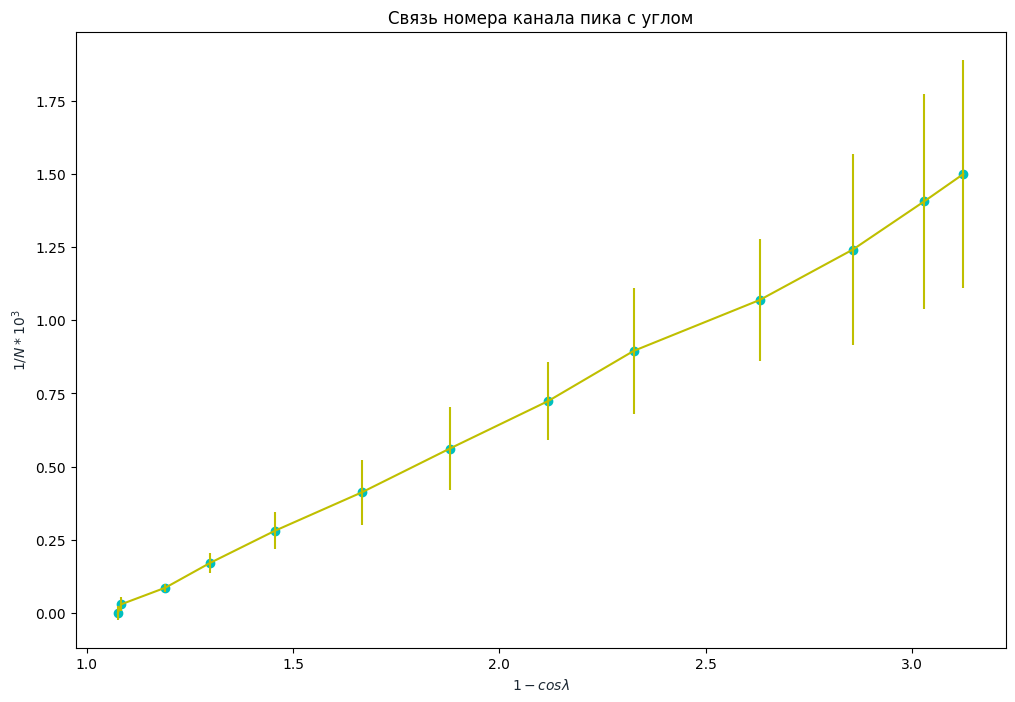

In [6]:
plt.figure(figsize=(12,8))
plt.ylabel('$1/N * 10^3$', color='#1C2833')
plt.xlabel('$ 1 - cos\lambda $', color='#1C2833')
plt.title("Связь номера канала пика с углом")
plt.plot(n, cos, "o", color = 'c')
q_cos = np.sin(true_alpha) * 0.15
q_n = 1/(channel**2) * q_channel
plt.errorbar(n, cos, q_n*1000, color='y')
data = {"$1/N * 10^3$": n, "$\sigma_{1/N}*10^3$": q_n*10**3,  
        "$ 1 - cos\theta $": cos, "$\sigma_{1 - cos\theta}$": q_cos}
display(pd.DataFrame(data).T)

# $Выводы$
Итак, в настоящей лабораторной работе нами была проведена проверка соотношения $\Delta \lambda = \Lambda_K(1-\cos\theta)$. Экспериментально установлено, что $\gamma$-кванты действительно испытывают упругое рассеяние на свободных частицах. 

Обратим наше внимание на то, что с увеличением угла $\theta$ погрешность измерения номера канала $\sigma_N$ увеличивается, что связано со смещением фотопика в сторону сплошного распределения, обязанного комптоновскому рассеянию.

На основании таблицы полученных данных можно определить энергию покоя частиц, на которых происходит комптоновское рассеивание. Путем несложных преобразований формула ${\star}$ принимает вид:
\begin{equation*}
    mc^2 = E(0) \frac{N(90)}{N(0)-N(90)},
\end{equation*}
где $E(0)$ - энергия $\gamma$-лучей, испускаемых источником (в нашем случае $^{137}$Cs), то есть 662 кэВ.
  
  
Имеем:
$\boxed{mc^2 = 430 \pm 20 \ \text{кэВ}}.$
Видно, что результат на 16\% меньше 511 кэВ - энергии покоя электрона. 